In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("/content/drive/MyDrive/linearregression/mcdonalds.csv")
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [67]:
dim=df.shape
dim

(1453, 15)

In [68]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [70]:
col_names=list(df.columns)
col_names

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

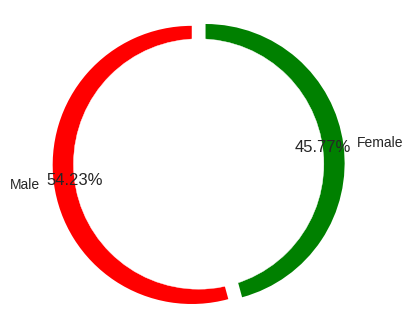

In [71]:
labels = ['Male','Female']
sizes = df['Gender'].value_counts()#[df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]

#colors
colors = ['red','green']

#explsion
explode = (0.05,0.05)
plt.figure(figsize=(4,4))
my_circle = plt.Circle( (0,0), 0.9, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%.2f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

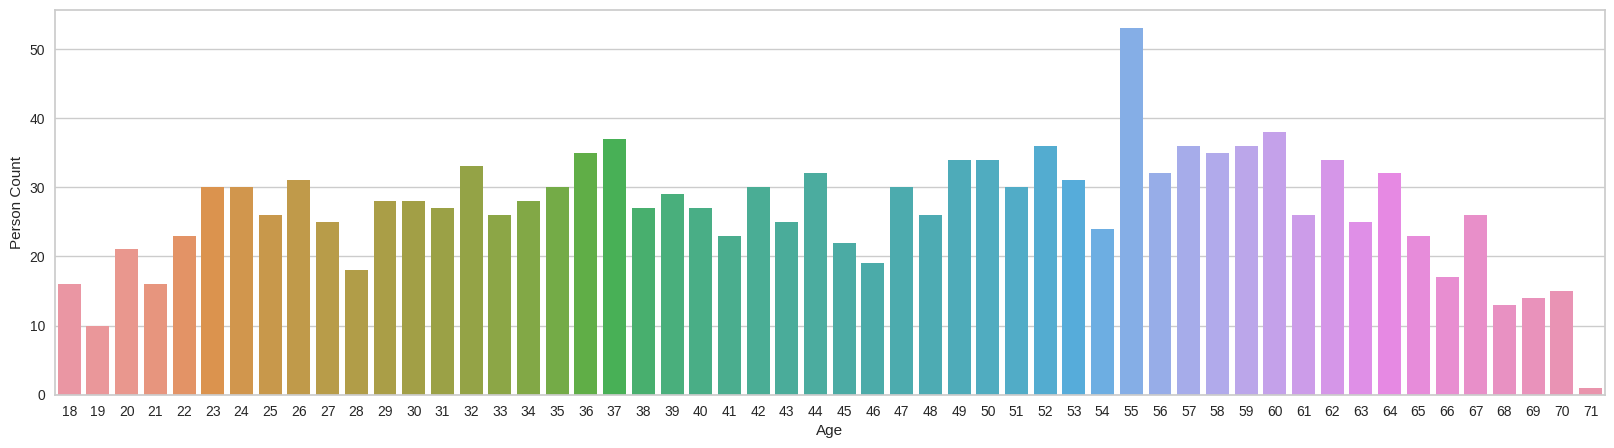

In [72]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'])
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

In [73]:
MD_x = pd.DataFrame(df.iloc[:, 0:11])
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [74]:
MD_x = (MD_x == "Yes").astype(int)
np.round(np.mean(MD_x, axis=0), 2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in MD_x.columns:
    MD_x[i]=le.fit_transform(MD_x[i])
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [76]:
from sklearn.decomposition import PCA
MD_pca = PCA().fit(MD_x)

In [77]:
MD_pcadata=pd.DataFrame(MD_pca.components_,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11"])
MD_pcadata

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,-0.476933,-0.155332,-0.006356,0.116232,0.304443,-0.108493,-0.337186,-0.471514,0.329042,-0.213711,0.374753
1,0.363790,0.016414,0.018809,-0.034094,-0.063839,-0.086972,-0.610633,0.307318,0.601286,0.076593,-0.139656
2,-0.304444,-0.062515,-0.037019,-0.322359,-0.802373,-0.064642,-0.149310,-0.287265,0.024397,0.192051,-0.088571
3,0.055162,-0.142425,0.197619,-0.354139,0.253960,-0.097363,0.118958,-0.002547,0.067816,0.763488,0.369539
4,-0.307535,0.277608,0.070620,-0.073405,0.361399,0.107930,-0.128973,-0.210899,-0.003125,0.287846,-0.729209
5,0.170738,-0.347830,-0.355087,-0.406515,0.209347,-0.594632,-0.103241,-0.076914,-0.261342,-0.178226,-0.210878
6,-0.280519,-0.059738,0.707637,-0.385943,0.036170,-0.086846,-0.040449,0.360453,-0.068385,-0.349616,-0.026792
7,0.013041,-0.113079,0.375934,0.589622,-0.138241,-0.627799,0.140060,-0.072792,0.029539,0.176303,-0.167181
8,0.572403,-0.018465,0.400280,-0.160512,-0.002847,0.166197,0.076069,-0.639086,0.066996,-0.185572,-0.072483
9,-0.110284,-0.665818,-0.075634,-0.005338,0.008707,0.239532,0.428087,0.079184,0.454399,-0.038117,-0.289592


In [78]:
print("Standard deviations")
print(np.round(MD_pca.explained_variance_ ** 0.5, 1))
print("variance ratio")
print(MD_pca.explained_variance_ratio_)
print("cummulative ratio")
print(np.cumsum(MD_pca.explained_variance_ratio_))

Standard deviations
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
variance ratio
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
cummulative ratio
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [79]:
MD_pca.components_=np.array(MD_pca.components_)*-1
rotated_df=pd.DataFrame(MD_pca.components_,columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10","pca11"],index=['yummy' ,'convenient', 'spicy', 'fattening', 'greasy' ,'fast', 'cheap', 'tasty','expensive', 'healthy', 'disgusting'])
rotated_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
yummy,0.476933,0.155332,0.006356,-0.116232,-0.304443,0.108493,0.337186,0.471514,-0.329042,0.213711,-0.374753
convenient,-0.363790,-0.016414,-0.018809,0.034094,0.063839,0.086972,0.610633,-0.307318,-0.601286,-0.076593,0.139656
spicy,0.304444,0.062515,0.037019,0.322359,0.802373,0.064642,0.149310,0.287265,-0.024397,-0.192051,0.088571
fattening,-0.055162,0.142425,-0.197619,0.354139,-0.253960,0.097363,-0.118958,0.002547,-0.067816,-0.763488,-0.369539
greasy,0.307535,-0.277608,-0.070620,0.073405,-0.361399,-0.107930,0.128973,0.210899,0.003125,-0.287846,0.729209
fast,-0.170738,0.347830,0.355087,0.406515,-0.209347,0.594632,0.103241,0.076914,0.261342,0.178226,0.210878
cheap,0.280519,0.059738,-0.707637,0.385943,-0.036170,0.086846,0.040449,-0.360453,0.068385,0.349616,0.026792
tasty,-0.013041,0.113079,-0.375934,-0.589622,0.138241,0.627799,-0.140060,0.072792,-0.029539,-0.176303,0.167181
expensive,-0.572403,0.018465,-0.400280,0.160512,0.002847,-0.166197,-0.076069,0.639086,-0.066996,0.185572,0.072483
healthy,0.110284,0.665818,0.075634,0.005338,-0.008707,-0.239532,-0.428087,-0.079184,-0.454399,0.038117,0.289592


In [80]:
rotated_df=rotated_df.transpose()
rotated_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
pca1,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
pca2,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
pca3,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
pca4,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
pca5,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
pca6,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
pca7,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
pca8,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
pca9,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069
pca10,0.213711,-0.076593,-0.192051,-0.763488,-0.287846,0.178226,0.349616,-0.176303,0.185572,0.038117,-0.157608


In [81]:
loadings = MD_pca.components_
num_pc = MD_pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = rotated_df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069


In [82]:
PC1 = PCA().fit_transform(MD_x)[:,0]
PC2 = PCA().fit_transform(MD_x)[:,1]
ldngs = MD_pca.components_
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = ['yummy' ,'convenient', 'spicy', 'fattening', 'greasy' ,'fast', 'cheap', 'tasty','expensive', 'healthy', 'disgusting']

In [83]:
%pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


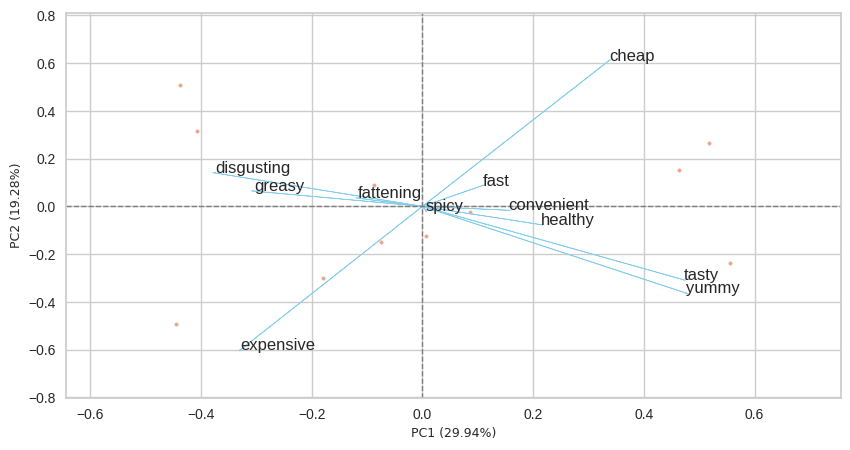

In [84]:
from bioinfokit.visuz import cluster
pca_scores = PCA().fit_transform(MD_pcadata)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(MD_pca.explained_variance_ratio_[0]*100, 2),var2=round(MD_pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

<Axes: >

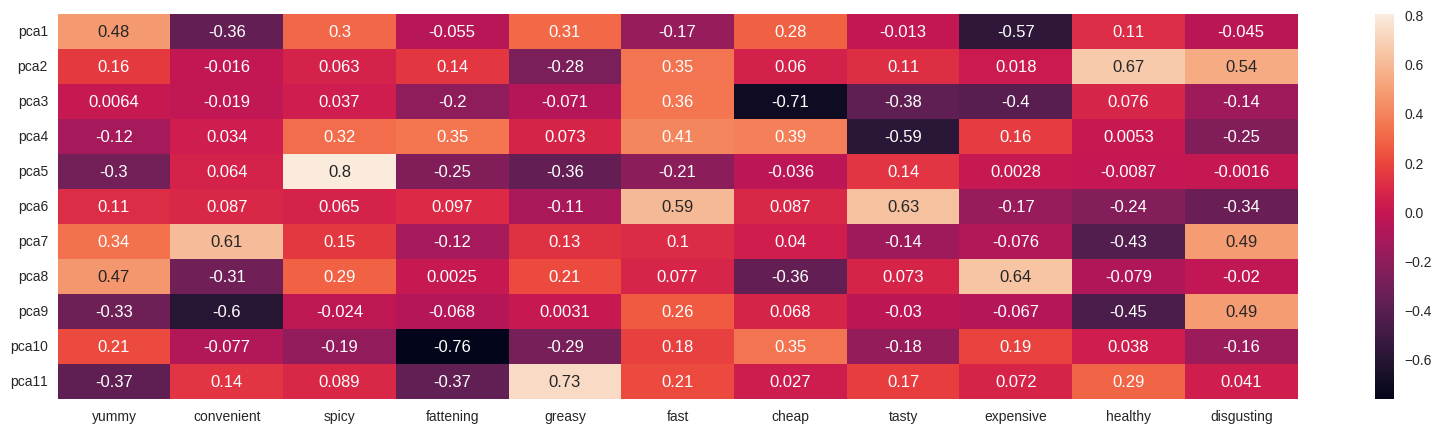

In [85]:
plt.figure(figsize=(20,5))
sns.heatmap(rotated_df,annot=True)

In [86]:
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from sklearn.cluster import KMeans

In [88]:
k_range = range(2, 9)
scores_k=[]
kmlabels=[]
for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x)
    kmlabels.append(km.labels_)
    scores_k.append(km.inertia_)
    print(km.labels_)

[1 0 0 ... 0 0 1]
[1 0 0 ... 0 2 1]
[1 3 3 ... 3 0 2]
[2 3 4 ... 4 0 1]
[2 5 0 ... 0 1 4]
[3 5 1 ... 1 6 4]
[4 2 5 ... 5 3 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

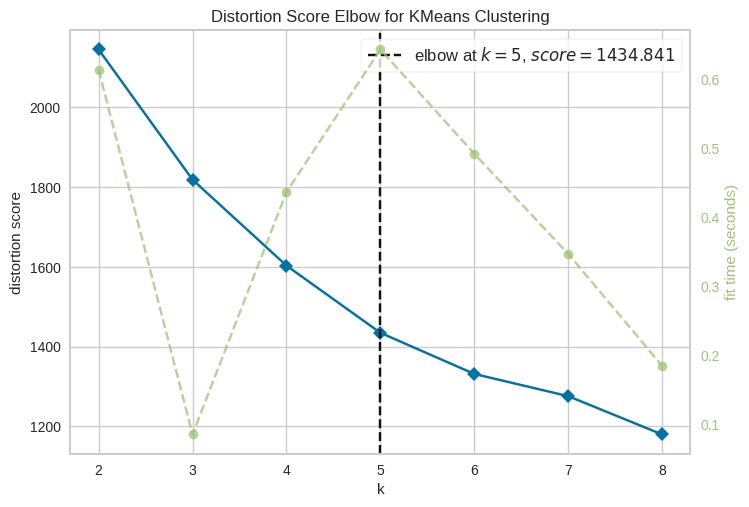

In [89]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 9))
visualizer.fit(MD_x)
visualizer.show()
plt.show()

In [90]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(MD_x)
MD_x['cluster_num'] = kmeans.labels_
print ('Labels:', kmeans.labels_)
print ('WCSS:', kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels: [3 1 4 ... 4 2 0]
WCSS: 1434.6060971914808


In [91]:
y_pred=kmeans.predict(MD_x[['yummy' ,'convenient', 'spicy', 'fattening', 'greasy' ,'fast', 'cheap', 'tasty','expensive', 'healthy', 'disgusting']])
y_pred

array([3, 1, 4, ..., 4, 2, 0], dtype=int32)

In [92]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(MD_x['cluster_num'],y_pred)
cf

array([[232,   0,   0,   0,   0],
       [  0, 309,   0,   0,   0],
       [  0,   0, 391,   0,   0],
       [  0,   0,   0, 264,   0],
       [  0,   0,   0,   0, 257]])

<Axes: xlabel='cluster_num', ylabel='Age'>

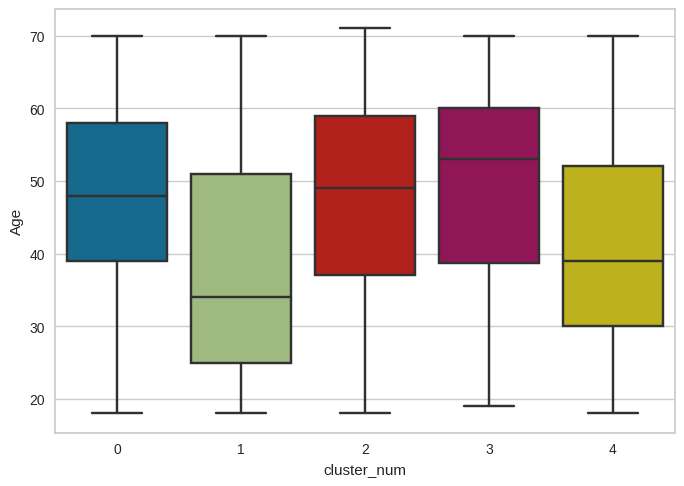

In [93]:
sns.boxplot(x=MD_x['cluster_num'],y=df['Age'])

In [94]:
df['cluster_num']=kmeans.labels_

df['expensive'] = LabelEncoder().fit_transform(df['expensive'])
expensive = df.groupby('cluster_num')['expensive'].mean() #grouping expensive within 5 cluster
expensive=expensive.to_frame().reset_index()


df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
frequency = df.groupby('cluster_num')['VisitFrequency'].mean() #grouping visitfrequency within 5 cluster
frequency=frequency.to_frame().reset_index()


df['tasty'] = LabelEncoder().fit_transform(df['tasty'])
tasty = df.groupby('cluster_num')['tasty'].mean()  #grouping tatsy within 5 cluster
tasty=tasty.to_frame().reset_index()


criteria = expensive.merge(frequency, on='cluster_num', how='left')
criteria =criteria.merge(tasty, on='cluster_num', how='left')
criteria

,cluster_num,expensive,VisitFrequency,tasty
0,0,0.922414,2.672414,0.086207
1,1,0.106796,2.653722,0.954693
2,2,0.030691,2.562660,0.966752
3,3,0.015152,2.742424,0.003788
4,4,1.000000,2.595331,0.941634


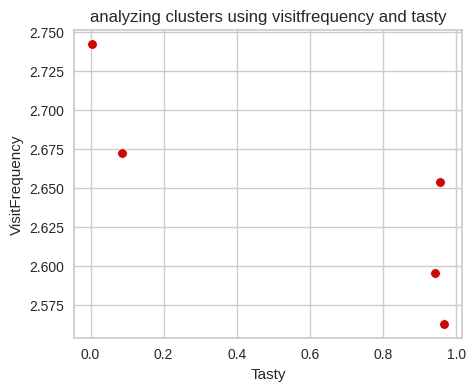

In [95]:
plt.figure(figsize = (5,4))
sns.scatterplot(y = "VisitFrequency", x = "tasty",data=criteria, color="r")
plt.title("analyzing clusters using visitfrequency and tasty")
plt.ylabel("VisitFrequency")
plt.xlabel("Tasty")
plt.show()

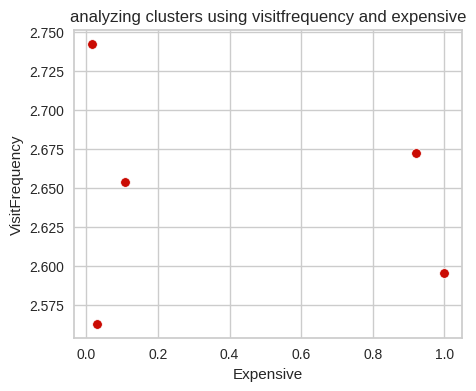

In [96]:
plt.figure(figsize = (5,4))
sns.scatterplot(y = "VisitFrequency", x = "expensive",data=criteria, color="r")
plt.title("analyzing clusters using visitfrequency and expensive")
plt.ylabel("VisitFrequency")
plt.xlabel("Expensive")
plt.show()